In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dns.name
import json
import os
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

### DNS HTTPS RR adoption: Overlapped Domains
Time range of overlapped domains are splitted into two time windows due to the change of tranco list:
1. 2023-05-08 to 2023-08-01
2. 2023-08-02 to 2024-03-31

In [10]:
start_d = datetime(2023,5,8)
end_d = datetime(2023,8,2)
ndays = (end_d - start_d).days
date_l1 = [start_d + timedelta(days=i) for i in range(ndays)]
print(date_l1[0],date_l1[-1])

2023-05-08 00:00:00 2023-08-01 00:00:00


In [11]:
start_d = datetime(2023,8,2)
end_d = datetime(2024,4,1)
ndays = (end_d - start_d).days
date_l2 = [start_d + timedelta(days=i) for i in range(ndays)]
print(date_l2[0], date_l2[-1])

2023-08-02 00:00:00 2024-03-31 00:00:00


In [13]:
# Read overlapped domain list
df_overlap1 = pd.read_csv("../data/plotting/overlap/overlapdom_part1.csv")
df_overlap2 = pd.read_csv("../data/plotting/overlap/overlapdom_part2.csv")

In [14]:
apex_httpsrr1 = pd.read_csv("../data/plotting/overlap/adoption_apex_httpsrr1.csv")
apex_httpsrr2 = pd.read_csv("../data/plotting/overlap/adoption_apex_httpsrr2.csv")
www_httpsrr1 = pd.read_csv("../data/plotting/overlap/adoption_www_httpsrr1.csv")
www_httpsrr2 = pd.read_csv("../data/plotting/overlap/adoption_www_httpsrr2.csv")

In [15]:
apex_httpsrr1['perc'] = apex_httpsrr1['num_httpsrr'].apply(lambda x: 100 * x / df_overlap1.shape[0])
apex_httpsrr2['perc'] = apex_httpsrr2['num_httpsrr'].apply(lambda x: 100 * x / df_overlap2.shape[0])
www_httpsrr1['perc'] = www_httpsrr1['num_httpsrr'].apply(lambda x: 100 * x / df_overlap1.shape[0])
www_httpsrr2['perc'] = www_httpsrr2['num_httpsrr'].apply(lambda x: 100 * x / df_overlap2.shape[0])

In [16]:
apex_httpsrr = pd.concat([apex_httpsrr1, apex_httpsrr2], ignore_index=True)
www_httpsrr = pd.concat([www_httpsrr1, www_httpsrr2], ignore_index=True)

In [17]:
apex_httpsrr['datetime'] = apex_httpsrr['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
www_httpsrr['datetime'] = www_httpsrr['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

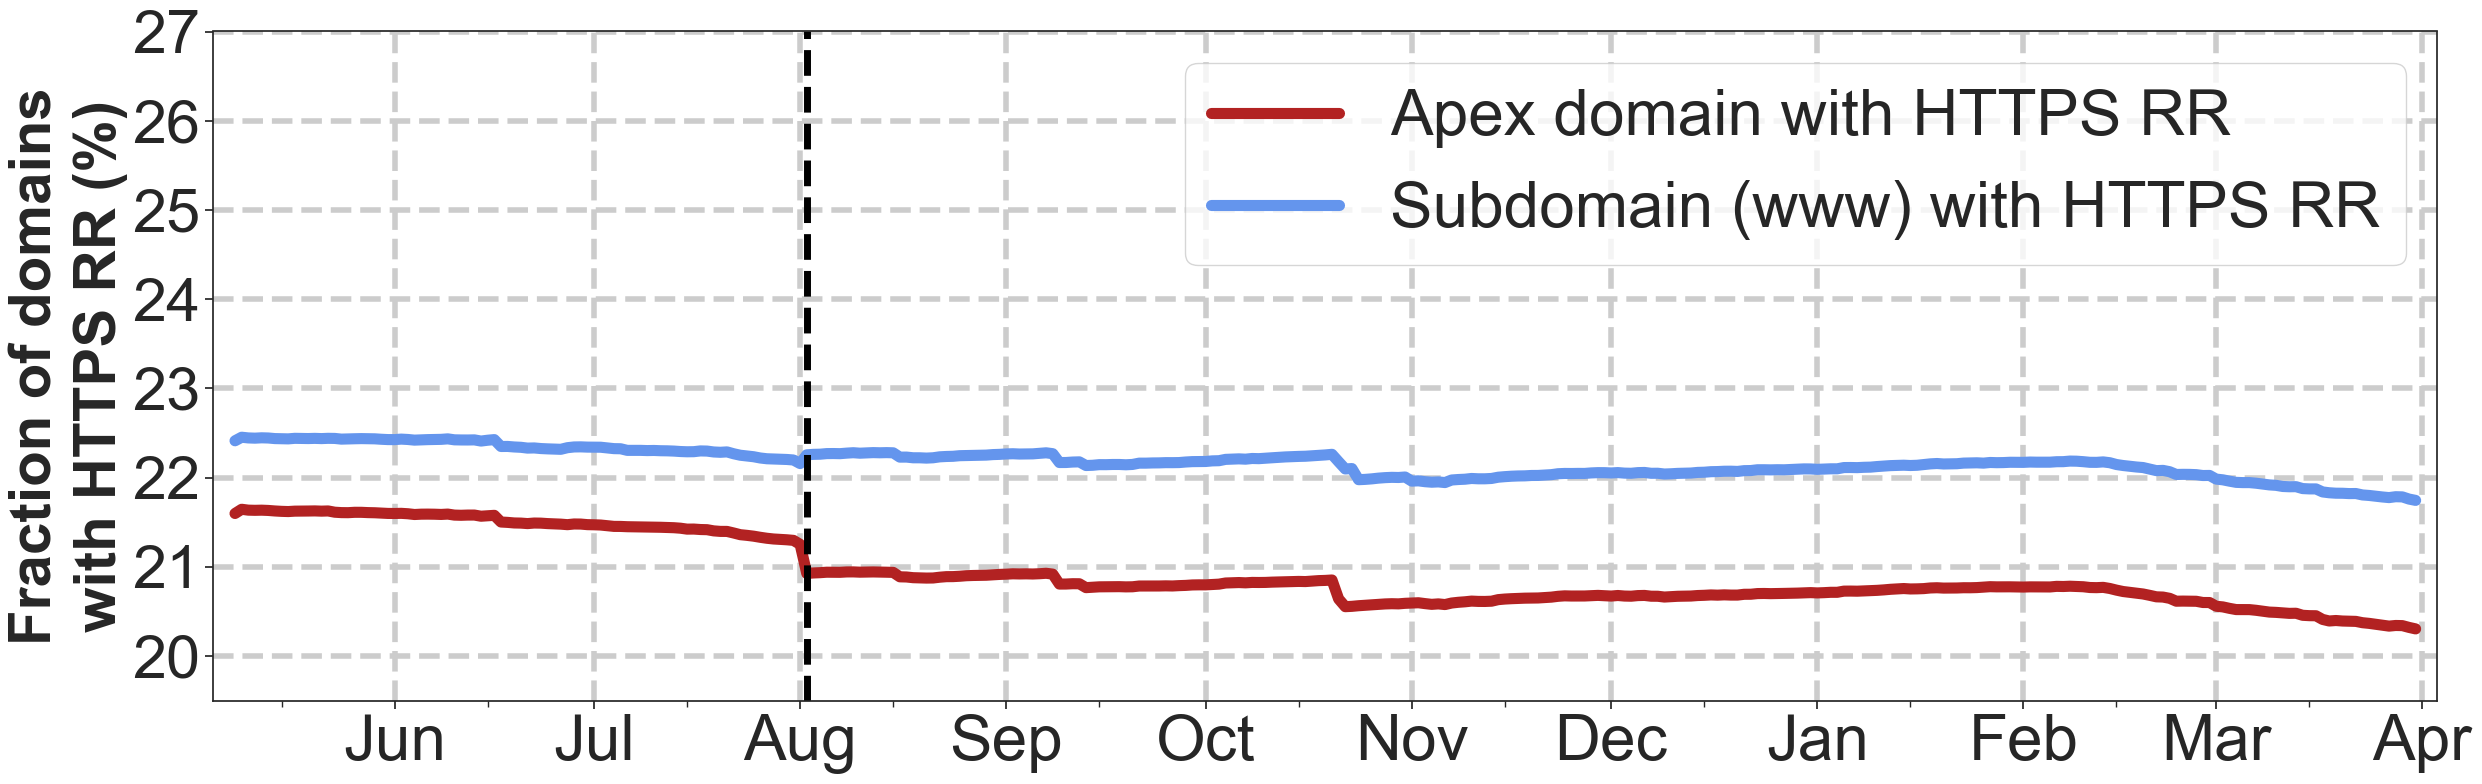

In [18]:
fig = plt.figure(figsize=(25,8))
sns.set(style="ticks")
ax = sns.lineplot(data=apex_httpsrr, x="datetime", y="perc", linewidth=8, color='firebrick', label='Apex domain with HTTPS RR')
ax2 = sns.lineplot(data=www_httpsrr, x="datetime", y="perc", linewidth=8, color='cornflowerblue', label='Subdomain (www) with HTTPS RR')
ax.grid(True, linestyle='--', linewidth=4)

ax.axvline(x=datetime.strptime("2023-08-02", "%Y-%m-%d"), color="black", linestyle="dashed", linewidth=5)

#ax.set_xlim(-0.05, 1.05)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax.set_ylim(19.5, 27)
ax.set_xlabel('')
ax.tick_params(axis='x')
plt.xticks(fontsize=46)
plt.yticks(fontsize=44)
plt.ylabel("Fraction of domains\nwith HTTPS RR (%)", fontsize=42, labelpad=3, fontweight='bold')
plt.margins(x=.01)

plt.legend(fontsize=46, loc="upper right")
fig.tight_layout()
#fig.savefig('../figures/overlapdom_httpsrr.png', dpi=200)
plt.show()